# Test of code_heatmaps


## Import modules

In [1]:
import pandas as pd
import numpy as np

try:
    from mutagenesis_visualization.main.scripts.code_heatmaps import (
        _hierarchical_sort, _helix, _labels, _sheet, _loop, plot_heatmap,
        plot_heatmap_rows, plot_heatmap_columns
    )
    from mutagenesis_visualization.main.scripts.code_create_objects import (
        hras_RBD
    )
except ModuleNotFoundError:
    import import_notebook
    import os
    directory = os.getcwd()
    new_directory = directory.replace('tests', 'main')
    os.chdir(new_directory)
    from code_heatmaps import (
        _hierarchical_sort, _helix, _labels, _sheet, _loop, plot_heatmap,
        plot_heatmap_rows, plot_heatmap_columns
    )
    from code_create_objects import (hras_RBD)
    os.chdir(directory)

importing Jupyter notebook from code_heatmaps.ipynb
importing Jupyter notebook from code_kwargs.ipynb
importing Jupyter notebook from code_utils.ipynb
importing Jupyter notebook from code_create_objects.ipynb
importing Jupyter notebook from code_class.ipynb
importing Jupyter notebook from code_kernel.ipynb
importing Jupyter notebook from code_bar.ipynb
importing Jupyter notebook from code_scatter.ipynb
importing Jupyter notebook from code_PCA.ipynb
importing Jupyter notebook from code_other.ipynb
importing Jupyter notebook from code_3D.ipynb
importing Jupyter notebook from code_plotly.ipynb
importing Jupyter notebook from code_pymol.ipynb


## Test main functions

In [2]:
def test_plot_heatmap():
    # Get object
    obj_test = hras_RBD()

    # Define aux function
    def _test_plot_heatmap_output(parameters):
        error = False
        try:
            obj_test.heatmap(
                **parameters
            )  # pass dictionary as arguments of method
        except:
            error = True
        return error

    # Define dictionary of parameters
    # Each dict in the list will be a different set of parameters
    list_params = [{'show': False}, {'hierarchical': True, 'show':
                                     False}, {'show_snv': True, 'show': False},
                   {'show_cartoon': True, 'show': False}]

    # Assert
    for parameters in list_params:
        assert _test_plot_heatmap_output(
            parameters
        ) == False, "plot_heatmap failed with {} parameters".format(parameters)

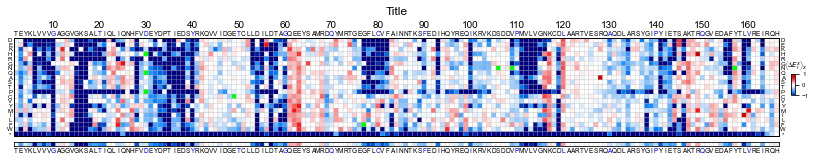

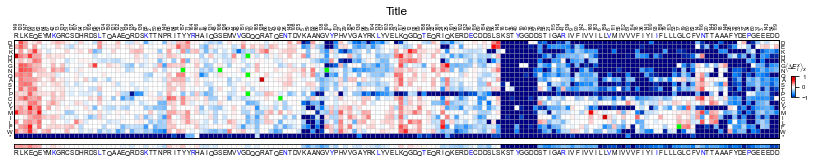

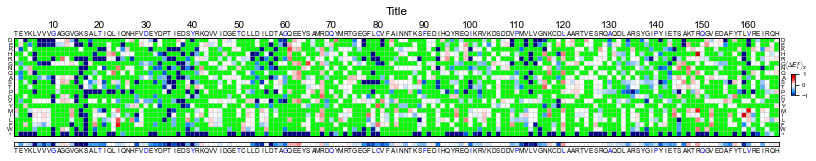

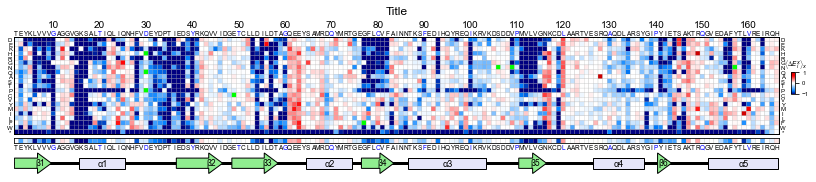

In [3]:
test_plot_heatmap()

## Test aux functions

In [ ]:
def test_hierarchical_sort():
    df = pd.DataFrame([[1, 7, 6, 2], [0, 0, 0, 0], [10, 10, 10, 10],
                       [1, 1, 1, 1]])
    result = _hierarchical_sort(df.T)
    assert (result == [2, 0, 1, 3]).all(), 'columns are not properly sorted out'

In [ ]:
def test_helix():
    '''testing function produces matplotlib object'''
    assert (
        str(type(_helix(0, 5))) == "<class 'matplotlib.patches.Rectangle'>"
    ), "function _helix failed"

In [ ]:
def test_labels():
    """testing function produces tuple"""
    assert (
        str(type(_labels(1)))
    ) == "<class 'tuple'>", "function _labels failed"

In [ ]:
def test_sheet():
    """testing function prouduces matplotlib object"""
    assert (
        str(type(_sheet(1, 5)))
    ) == "<class 'matplotlib.patches.FancyArrow'>", "function _sheet failed"

In [ ]:
def test_loop():
    '''testing function produces matplotlib object'''
    assert (
        str(type(_loop(1, 5)))
    ) == "<class 'matplotlib.patches.Rectangle'>", "function _loop failed"